# UCI 3W Dataset

In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from config import data_raw_folder, data_processed_folder
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
source_folder = os.path.join(data_raw_folder, "UCI ML Repository/3W")
target_folder = data_processed_folder

In [68]:
df = pd.read_csv(os.path.join(source_folder, "4/WELL-00010_20180426220116.csv"))
df

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2018-04-26 22:01:16.000000,23664230.0,15614310.0,58.846,6175139.0,33.42652,NaN,NaN,1.406237,4
1,2018-04-26 22:01:17.000000,23664850.0,15646480.0,58.892,6177412.0,33.47507,NaN,NaN,1.406018,4
2,2018-04-26 22:01:18.000000,23665470.0,15516630.0,58.638,6179685.0,33.52362,NaN,NaN,1.405800,4
3,2018-04-26 22:01:19.000000,23666090.0,15386780.0,58.384,6181957.0,33.57217,NaN,NaN,1.405581,4
4,2018-04-26 22:01:20.000000,23666710.0,15329330.0,58.192,6184230.0,33.62072,NaN,NaN,1.405362,4
...,...,...,...,...,...,...,...,...,...,...
7120,2018-04-26 23:59:56.000000,23688050.0,15270150.0,58.282,6279988.0,35.68391,NaN,NaN,1.423730,4
7121,2018-04-26 23:59:57.000000,23688290.0,15202920.0,58.180,6279988.0,35.69761,NaN,NaN,1.427863,4
7122,2018-04-26 23:59:58.000000,23688530.0,15233950.0,58.296,6279988.0,35.71130,NaN,NaN,1.431996,4
7123,2018-04-26 23:59:59.000000,23688770.0,15264970.0,58.412,6279988.0,35.72500,NaN,NaN,1.436129,4


In [73]:
df2 = pd.read_csv(os.path.join(source_folder, "4/WELL-00010_20180426200107.csv"))
df2

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2018-04-26 20:01:07.000000,23687590.0,15200620.0,58.020,6099761.0,35.71913,NaN,NaN,1.394194,4
1,2018-04-26 20:01:08.000000,23686760.0,15230500.0,58.085,6105821.0,35.70609,NaN,NaN,1.392947,4
2,2018-04-26 20:01:09.000000,23685930.0,15260380.0,58.150,6116352.0,35.69304,NaN,NaN,1.391701,4
3,2018-04-26 20:01:10.000000,23685100.0,15290260.0,58.215,6126882.0,35.68000,NaN,NaN,1.390454,4
4,2018-04-26 20:01:11.000000,23684270.0,15320130.0,58.280,6137412.0,35.61261,NaN,NaN,1.391618,4
...,...,...,...,...,...,...,...,...,...,...
7129,2018-04-26 21:59:56.000000,23658910.0,15307490.0,58.864,5599988.0,32.53087,NaN,NaN,1.408083,4
7130,2018-04-26 21:59:57.000000,23658420.0,15184540.0,58.560,5599685.0,32.42565,NaN,NaN,1.407345,4
7131,2018-04-26 21:59:58.000000,23657930.0,15201770.0,58.736,5599382.0,32.32043,NaN,NaN,1.406606,4
7132,2018-04-26 21:59:59.000000,23657440.0,15219010.0,58.912,5599079.0,32.21522,NaN,NaN,1.407935,4


In [69]:
df.loc[df["class"].isin([101, 108]), "class"] = np.nan
df["class"] = df["class"].fillna(0)
df["class"].unique()

array([4.])

In [70]:
def z_score(df, columns=[]):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in columns:
        if column in df_std.columns:
            df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

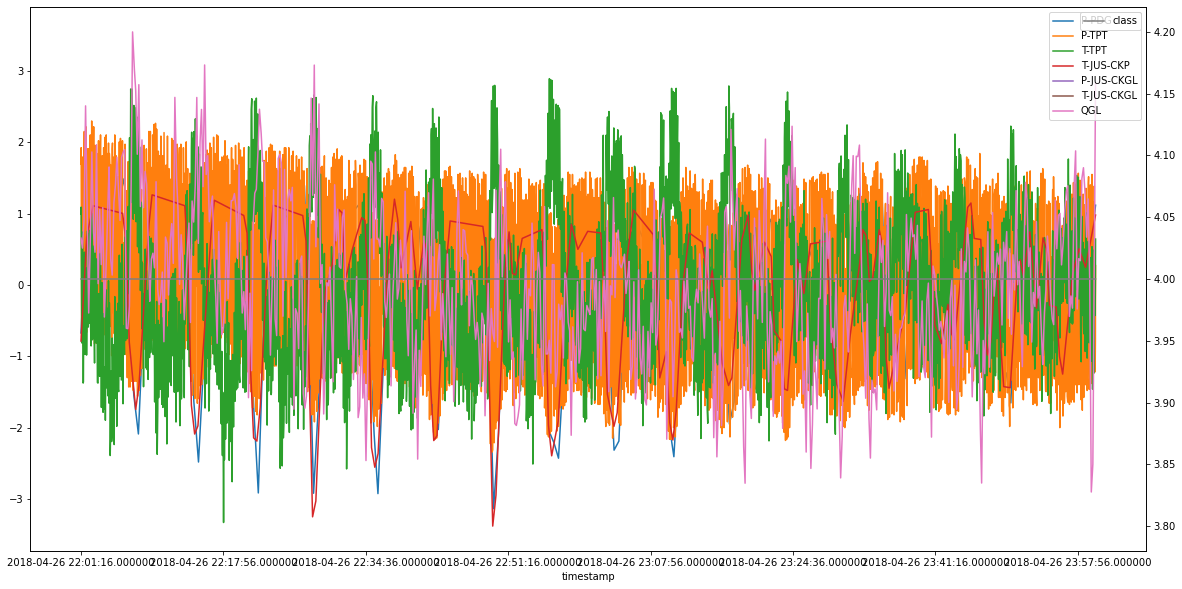

In [71]:
columns = ["P-PDG", "P-TPT", "T-TPT", "T-JUS-CKP", "P-JUS-CKGL", "T-JUS-CKGL", "QGL"]
df_plot = z_score(df, columns=columns)
df_plot.plot(x="timestamp", y=columns)
df_plot["class"].plot(x="timestamp", secondary_y=True)
plt.legend()
plt.show()

In [165]:
# all subfolders
well = "WELL-00002"
folders = [os.path.join(source_folder, d) for d in os.listdir(source_folder) if os.path.isdir(os.path.join(source_folder, d))]
well10_files = [os.path.join(folder, f) for folder in folders for f in os.listdir(folder) if well in f]
len(well10_files)

328

In [ ]:
# one subfolder
subfolder = "4"
folder = os.path.join(source_folder, subfolder)
well10_files = [os.path.join(folder, f) for f in os.listdir(folder) if "WELL-00002" in f]
len(well10_files)

In [166]:
dfs = []
for f in well10_files:
    dfs.append(pd.read_csv(f))
df_10 = pd.concat(dfs)
df_10 = df_10.sort_values(by="timestamp", ascending=True)
df_10 = df_10.reset_index(drop=True)
df_10["timestamp"] = pd.to_datetime(df_10["timestamp"])
df_10

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2013-11-04 01:41:01,0.0,18852350.0,116.7782,9599435.0,173.09610,2902859.0,NaN,0.0,0.0
1,2013-11-04 01:41:02,0.0,18852350.0,116.7781,9599434.0,173.09610,2902867.0,NaN,0.0,0.0
2,2013-11-04 01:41:03,0.0,18852350.0,116.7780,9599432.0,173.09610,2902875.0,NaN,0.0,0.0
3,2013-11-04 01:41:04,0.0,18852350.0,116.7779,9599431.0,173.09610,2902882.0,NaN,0.0,0.0
4,2013-11-04 01:41:05,0.0,18852350.0,116.7779,9599429.0,173.09610,2902890.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4534403,2017-08-13 19:58:43,0.0,8533063.0,117.6621,1228506.0,75.71454,2318954.0,NaN,0.0,0.0
4534404,2017-08-13 19:58:44,0.0,8533115.0,117.6623,1219368.0,75.71479,2318954.0,NaN,0.0,0.0
4534405,2017-08-13 19:58:45,0.0,8533168.0,117.6624,1210230.0,75.71504,2318954.0,NaN,0.0,0.0
4534406,2017-08-13 19:58:46,0.0,8533221.0,117.6626,1201091.0,75.71529,2318954.0,NaN,0.0,0.0


In [169]:
#df_10.loc[df_10["class"].isin([101, 102, 106, 108]), "class"] = np.nan
#df_10["class"] = df_10["class"].fillna(0)
df_10["class"].unique()

array([  0.,  nan, 102.,   2.,   4., 101.,   1., 106.,   6.])

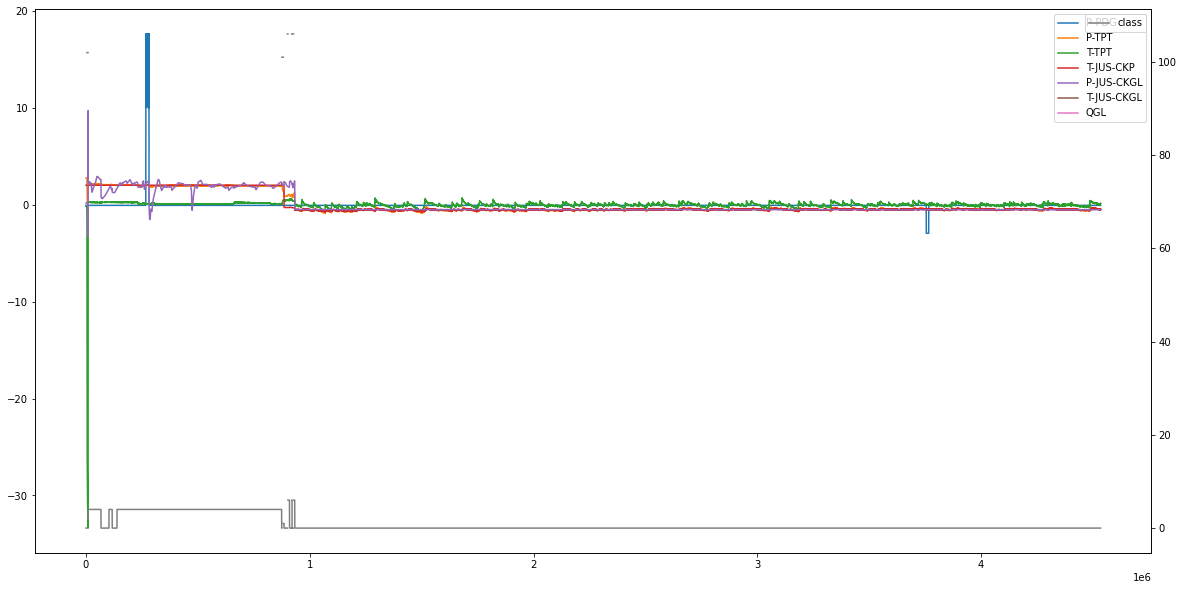

In [173]:
columns = ["P-PDG", "P-TPT", "T-TPT", "T-JUS-CKP", "P-JUS-CKGL", "T-JUS-CKGL", "QGL"]
df_plot = z_score(df_10, columns=columns)
#df_plot = df_plot.set_index("timestamp")
#df_plot = df_plot.iloc[15000:25000]
df_plot.plot(y=columns)
df_plot["class"].plot(secondary_y=True)
plt.legend()
plt.show()

In [172]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534408 entries, 0 to 4534407
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   timestamp   datetime64[ns]
 1   P-PDG       float64       
 2   P-TPT       float64       
 3   T-TPT       float64       
 4   P-MON-CKP   float64       
 5   T-JUS-CKP   float64       
 6   P-JUS-CKGL  float64       
 7   T-JUS-CKGL  float64       
 8   QGL         float64       
 9   class       float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 345.9 MB


In [174]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534408 entries, 0 to 4534407
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   timestamp   datetime64[ns]
 1   P-PDG       float64       
 2   P-TPT       float64       
 3   T-TPT       float64       
 4   P-MON-CKP   float64       
 5   T-JUS-CKP   float64       
 6   P-JUS-CKGL  float64       
 7   T-JUS-CKGL  float64       
 8   QGL         float64       
 9   class       float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 345.9 MB
